In [12]:
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
mnist = fetch_openml('mnist_784')

In [14]:
X = pd.DataFrame(mnist['data'])
y = pd.Series(mnist['target']).astype(int)
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
x_train,x_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
# shuffle_index = np.random.permutation(60000)
# x_train= x_train[shuffle_index]
# y_train = y_train[shuffle_index]
# x_train = pd.DataFrame(x_train)
# x_test = pd.DataFrame(x_test)
# y_train = pd.DataFrame(y_train)
# y_test = pd.DataFrame(y_test)
# print(type(X))
# print(type(y))
# print(type(x_train))
print(type(y_train))
# print(x_train.head())
print(y_train.head())
# print(X.shape)
# print(x_train.shape)
# print(x_train.loc[[3600],:])
# print(x_train['pixel3'])
# print(x_train.shape)
# print(y_train.head(60) == '5')


<class 'pandas.core.series.Series'>
0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int32


60000    7
60001    2
60002    1
60003    0
60004    4
Name: class, dtype: int32
The number is: 2


(-0.5, 27.5, 27.5, -0.5)

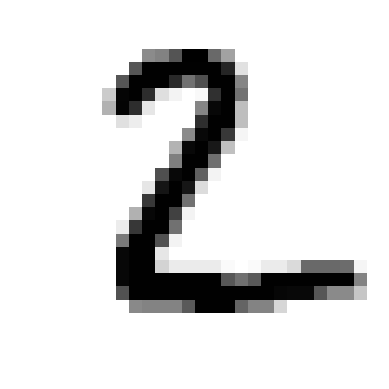

In [15]:
print(y_test.head())
some_digit_index = 1
some_digit = x_test.iloc[[some_digit_index],:].to_numpy()
# print(y_train.loc[0,'class'])
print('The number is:',y_test.iloc[some_digit_index])
some_digit_image = some_digit.reshape((28,28))
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')

In [16]:
digit_to_detect = 2
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_1 = (y_train ==digit_to_detect)
y_test_1 = (y_test == digit_to_detect)
# print(y_test.head(15) == 5)
model = LogisticRegression(tol = 0.1,max_iter=1000)
model.fit(x_train,y_train_1)
prediction = model.predict(some_digit)
print(prediction)
true_label = (y_test_1.iloc[[some_digit_index]]).to_numpy()
# true_label = (y_test_1.iloc[[some_digit_index]]).values()
# print(type(true_label))
print('Accuracy: ', accuracy_score(true_label,prediction) * 100)



[ True]
Accuracy:  100.0


C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
